<a href="https://colab.research.google.com/github/kiranahire03/Hotel-booking-analysis/blob/main/Hotel_Booking_Analysis_Kiran_Ahire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Exploratory Data Analysis on 'Hotel Booking Analysis'**

---

\



In [70]:
#importing useful libraries 
import pandas as pd
import numpy as ny 
from matplotlib import pyplot as plt
import seaborn as sns

In [71]:
#Reading file from google drive
path = '/content/drive/MyDrive/Hotel Bookings.csv'
hotel_df = pd.read_csv(path)

## **Understanding the Data**



---





In [72]:
#Getting first five rows
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [73]:
#Getting last five rows
hotel_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [74]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

As we can see,"Agent" and "Company" have lot of null values,need to fill null values

In [75]:
#filling missing values
hotel_df['agent'] = hotel_df['agent'].fillna(0)
hotel_df['company'] = hotel_df['company'].fillna(0)
hotel_df['children'] = hotel_df['children'].fillna(0)
hotel_df['country'] = hotel_df['country'].fillna(0)

In [76]:
#Percentage of missing values in our dataset
missing_values = (((hotel_df.isnull().sum()).sum())/hotel_df.size)*100
missing_values

0.0

Now we can see our dataset do not have missing values now.

---



Attribute "Children" cant have datatype float so lets change it to a int,

In [77]:
hotel_df['children'] = hotel_df['children'].astype(int)

In [78]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

In [79]:
#Getting number of rows and columns 
hotel_df.shape

(119390, 32)

In [80]:
#Gettting columns in dataset
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [81]:
#Getting datatype
hotel_df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [82]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,10.775157,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,53.943884,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [83]:
#finding unique values
for i in hotel_df.columns:
  print(i,hotel_df[i].nunique())

hotel 2
is_canceled 2
lead_time 479
arrival_date_year 3
arrival_date_month 12
arrival_date_week_number 53
arrival_date_day_of_month 31
stays_in_weekend_nights 17
stays_in_week_nights 35
adults 14
children 5
babies 5
meal 5
country 178
market_segment 8
distribution_channel 5
is_repeated_guest 2
previous_cancellations 15
previous_bookings_not_canceled 73
reserved_room_type 10
assigned_room_type 12
booking_changes 21
deposit_type 3
agent 334
company 353
days_in_waiting_list 128
customer_type 4
adr 8879
required_car_parking_spaces 5
total_of_special_requests 6
reservation_status 3
reservation_status_date 926


In [84]:
#Renaming columns
hotel_df.rename(columns = {'hotel':'Hotel','is_canceled':'is canceled','lead_time':'Lead time','arrival_date_year':'Year','arrival_date_month':'Month','arrival_date_day_of_month':'Day',
                           'arrival_date_week_number':'Week','stays_in_weekend_nights':'stays in weekend nights','stays_in_week_nights':'stays in week nights','adults':'Adults','children':'Children',
                           'babies':'Babies','meal':'Meal','country':'Country','market_segment':'Market segment','distribution_channel':'Distribution channel',
                           'is_repeated_guest':'Repeated Guest','previous_cancellations':'Previous cancellations','previous_bookings_not_canceled':'Previous bookings not canceled',
                           'reserved_room_type':'Reserved Room Type','assigned_room_type':'Assigned Room Type','booking_changes':'Booking changes','deposit_type':'Deposit Type',
                           'agent':'Agent','company':'Company','days_in_waiting_list':'Waiting Days','customer_type':'Customer Type','adr':'ADR','required_car_parking_spaces':'Parking space',
                            'total_of_special_requests':'Special Request','reservation_status':'Reservation Status','reservation_status_date':'Reservation Status Date'},inplace = True)
                           

# **Cleaned Dataset**

In [85]:
#Creating Dataframe with necessary columns only
hotel_df2 = hotel_df[['Hotel','Lead time','Year','Month','Week','Day','stays in weekend nights','stays in week nights','Adults','Children','Babies',
                      'Meal','Country','Market segment','Distribution channel','Repeated Guest','Reserved Room Type','Assigned Room Type','Deposit Type',
                      'Agent','Waiting Days','Customer Type','ADR','Special Request','Reservation Status','Reservation Status Date' ]]
hotel_df2.head()

,Hotel,Lead time,Year,Month,Week,Day,stays in weekend nights,stays in week nights,Adults,Children,Babies,Meal,Country,Market segment,Distribution channel,Repeated Guest,Reserved Room Type,Assigned Room Type,Deposit Type,Agent,Waiting Days,Customer Type,ADR,Special Request,Reservation Status,Reservation Status Date
0,Resort Hotel,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,C,C,No Deposit,0.0,0,Transient,0.0,0,Check-Out,2015-07-01
1,Resort Hotel,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,C,C,No Deposit,0.0,0,Transient,0.0,0,Check-Out,2015-07-01
2,Resort Hotel,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,A,C,No Deposit,0.0,0,Transient,75.0,0,Check-Out,2015-07-02
3,Resort Hotel,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,A,A,No Deposit,304.0,0,Transient,75.0,0,Check-Out,2015-07-02
4,Resort Hotel,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,A,A,No Deposit,240.0,0,Transient,98.0,1,Check-Out,2015-07-03


# **Univariate Analysis**

---







In [86]:
hotel_df2['Customer Type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: Customer Type, dtype: int64

In [87]:
(hotel_df2['Customer Type'].value_counts()/hotel_df2.shape[0])*100

Transient          75.059050
Transient-Party    21.043638
Contract            3.414021
Group               0.483290
Name: Customer Type, dtype: float64

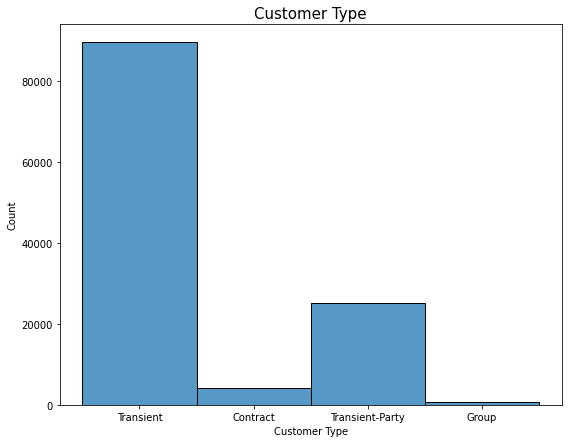

In [88]:
plt.figure(figsize = (9,7))
sns.histplot(hotel_df2['Customer Type'],palette = 'cubehelix')
plt.title('Customer Type',fontsize = 15)
plt.show()

**Coclusion** : 75% customers are Transient type

*   21% customers are Transient party type and rest are in between 0-3%









In [89]:
#Finding top 10 countries having most number of customers
hotel_df2['Country'].value_counts()[:10]

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: Country, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


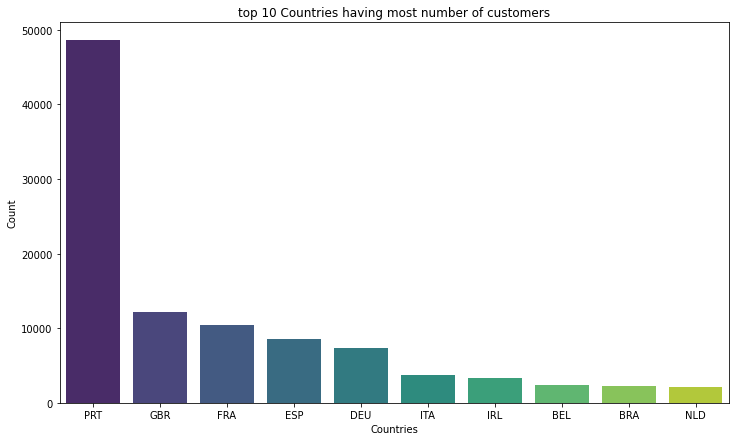

In [90]:
plt.figure(figsize = (12,7))
sns.barplot(hotel_df2['Country'].value_counts()[:10].index,hotel_df2['Country'].value_counts()[:10].values,palette = 'viridis')
plt.title('top 10 Countries having most number of customers')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.show()

**Conclusion** : According to research most number of customers are from Portugal followed by Great Britain and then Spain.

In [91]:
hotel_df2['Distribution channel'].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: Distribution channel, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


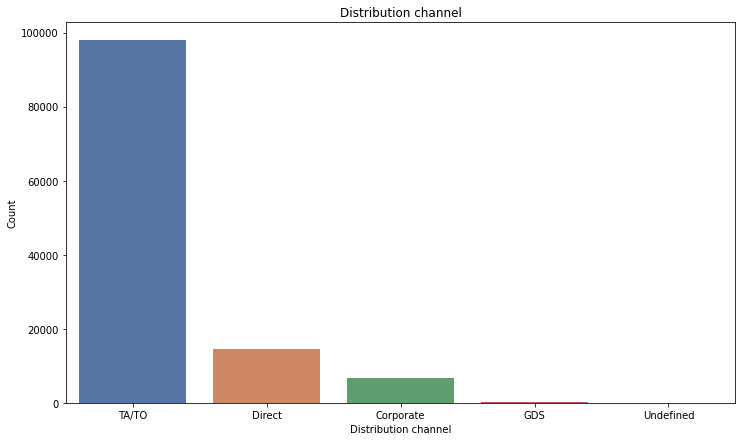

In [96]:
plt.figure(figsize = (12,7))
sns.barplot(hotel_df2['Distribution channel'].value_counts().index,hotel_df2['Distribution channel'].value_counts().values,palette = 'deep')
plt.title('Distribution channel')
plt.xlabel('Distribution channel')
plt.ylabel('Count')
plt.show()

**Coclusion** : As from above Barpot we can Coclude that most of the bookings are through Travel Agents followed by Direct Bookings.